# Project Objective

- Klasifikasi diabetes dengan algoritma Decision Tree
- Outpunya apakah terkena diabetes atau non-diabetes
- Evaluasi akurasi model Decision Tree dalam klasifikasi diabetes

# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

from imblearn.over_sampling import SMOTE
from sklearn.tree import plot_tree

# Load Dataset

In [ ]:
df = pd.read_csv('/content/diabetes.csv')

## Asessing Dataset

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Cek missing value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Cek duplikat
df.duplicated().sum()

0

# EDA

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

## Find Correlation

In [ ]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


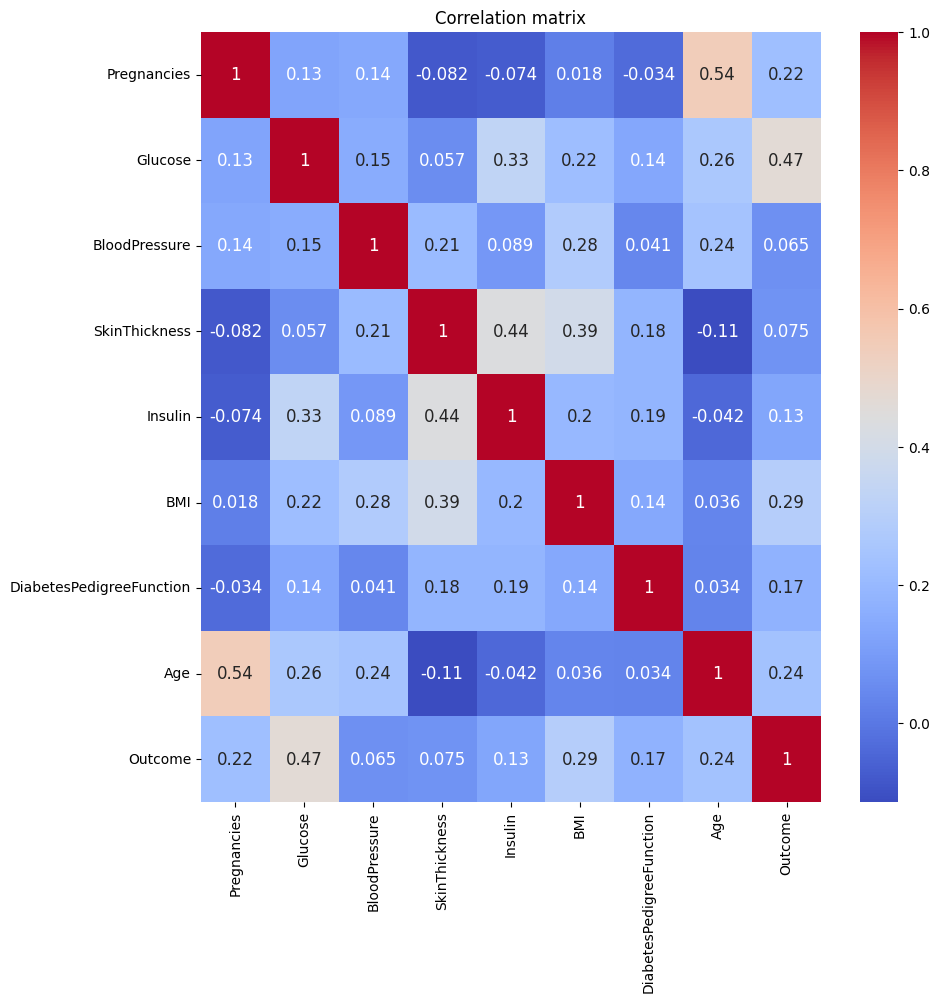

In [ ]:
dfcorr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(dfcorr, annot=True, annot_kws={"size":12}, cmap="coolwarm")
plt.title("Correlation matrix")
plt.show()

# PreProcessing


In [ ]:
# feature variables
X = df.drop(['Outcome'], axis=1)

#target variable
y=df.Outcome


In [ ]:
# Split data 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## SMOTE to balance the outcome classes

In [ ]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Modelling

In [ ]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

In [ ]:
# Train Decision Tree Classifer
model = model.fit(X_train,y_train)

In [ ]:
#Predict the response for test dataset
y_pred = model.predict(X_test)

# Show model accuracy
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

Accuracy: 71.42857142857143


## Fine Tuning

In [ ]:
# Create a parameter grid
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [None, 'balanced']
}

In [ ]:
# Initialize the Decision Tree classifier
dt = DecisionTreeClassifier(criterion="entropy")

In [ ]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, scoring='f1')

In [ ]:
# Fit GridSearchCV
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'class_weight': [None, 'balanced'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1')

In [ ]:
# Print the best parameters found by GridSearchCV
print(f"Best parameters: {grid_search.best_params_}")

Best parameters: {'class_weight': 'balanced', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 10}


In [ ]:
# Use the best model
best_model = grid_search.best_estimator_

In [ ]:
# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Model Accuracy
print("Accuracy:",accuracy_score(y_test, y_pred)*100)

Accuracy: 75.75757575757575


# Evaluation

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("\nClassification Report:\n", classification_rep)

Accuracy: 0.7576
Precision: 0.6283
Recall: 0.8353
F1-Score: 0.7172

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.71      0.79       146
           1       0.63      0.84      0.72        85

    accuracy                           0.76       231
   macro avg       0.75      0.77      0.75       231
weighted avg       0.79      0.76      0.76       231



# Deployment

In [ ]:
# Function to make a prediction based on user input
def make_prediction(model, input_data):
    # Convert input data to a NumPy array and reshape it for prediction
    input_array = np.array(input_data).reshape(1, -1)

    # Make a prediction
    prediction = model.predict(input_array)

    # Return the prediction
    return prediction[0]

## Input From User

In [ ]:
# Get user input
print("Please enter the following values:")
pregnancies = int(input("Pregnancies: "))
glucose = int(input("Glucose: "))
blood_pressure = int(input("BloodPressure: "))
skin_thickness = int(input("SkinThickness: "))
insulin = int(input("Insulin: "))
bmi = float(input("BMI: "))  # Accepting BMI as float
diabetes_pedigree_function = float(input("DiabetesPedigreeFunction: "))  # Accepting DiabetesPedigreeFunction as float
age = int(input("Age: "))

# Create a list with the input values
input_data = [pregnancies, glucose, blood_pressure, skin_thickness, insulin, bmi, diabetes_pedigree_function, age]

# Make a prediction
prediction = make_prediction(model, input_data)
print(f"The predicted class for the input data is: {'Diabetic' if prediction == 1 else 'Non-Diabetic'}")

Please enter the following values:
Pregnancies: 1
Glucose: 85
BloodPressure: 66
SkinThickness: 29
Insulin: 0
BMI: 26.6
DiabetesPedigreeFunction: 0.351
Age: 31
The predicted class for the input data is: Non-Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Input From Code

In [ ]:
# Example user input
user_input = {
    'Pregnancies': 8,
    'Glucose': 183,
    'BloodPressure': 64,
    'SkinThickness': 0,
    'Insulin': 0,
    'BMI': 23.3,  # Float value
    'DiabetesPedigreeFunction': 0.672,  # Float value
    'Age': 32
}

# Extract input values in the correct order
input_data = [user_input['Pregnancies'], user_input['Glucose'], user_input['BloodPressure'],
              user_input['SkinThickness'], user_input['Insulin'], user_input['BMI'],
              user_input['DiabetesPedigreeFunction'], user_input['Age']]

# Make a prediction
prediction = make_prediction(model, input_data)
print(f"The predicted class for the input data is: {prediction}")

The predicted class for the input data is: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
